# Portfolio 1: Cycling GPS Data

In this portfolio you are asked to analyse some data collected from a portable GPS 
device during a number of cycling races. 

In [22]:
import pandas as pd
import numpy as np
import utils
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Utility Function

You are provided with the definition of a function `parse_gpx` in the utils module that will read 
the XML data file and return a Pandas DataFrame.

In [3]:
df = utils.parse_gpx('data/ride1.gpx')
df.head()

,elevation,latitude,longitude
2012-09-22 21:46:56,35.6,-33.899426,150.97589
2012-09-22 21:46:56,35.6,-33.899426,150.97589
2012-09-22 21:46:56,35.6,-33.899426,150.97589
2012-09-22 21:46:56,35.6,-33.899426,150.97589
2012-09-22 21:46:56,35.6,-33.899426,150.97589


In [4]:
# continute your analysis here...

#data exploration
print(df.isnull().values.any())#check if the data contains any na value
print(df.dtypes) #check data type
print(df.describe()) # check for unusual values

df=df.drop_duplicates()#remove duplicated records

False
elevation    float64
latitude     float64
longitude    float64
dtype: object
         elevation     latitude    longitude
count  1677.000000  1677.000000  1677.000000
mean     34.606798   -33.898839   150.978788
std       4.948602     0.001668     0.002131
min      22.800000   -33.901209   150.975771
25%      31.000000   -33.900501   150.976567
50%      35.400000   -33.899401   150.978910
75%      38.400000   -33.896987   150.980892
max      45.000000   -33.896114   150.982015


# Data Cleaning

There are missing value in the data. However, there are few duplicated records that latitude and longitude at the begining of the race. These repulicated records have been removed from our analysis.

# Task Calculating Speed (Race 1)

In [5]:
#modify into a new DataFrame with all the calculation 
df = utils.speed_cal('latitude','longitude','elevation', df)

In [6]:
print('The average speed for the rider in Race 1 is: %.2f' % df['speed'].mean() +"km/h")

The average speed for the rider in Race 1 is: 38.07km/h


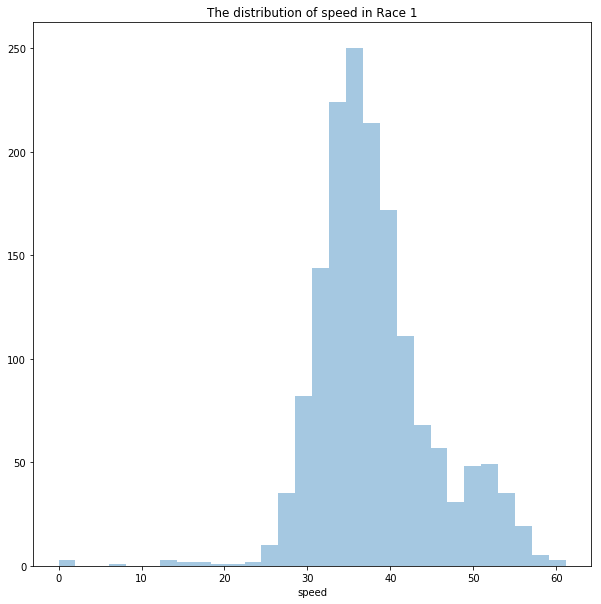

In [25]:
#plot of histogram showing the distribution of speed
plt.figure(figsize=(10,10))
sns.distplot(df['speed'],kde=False,bins=30)
plt.title('The distribution of speed in Race 1')
plt.show()

The distribution of the rider's speed is in "m" shape with higher peak at 35km/hr and lower peak at 52km/hr. The shape indicates there are two different distributions of speed being put together, such as the cyclist has one speed distribution for climbing and level, another speed for downhilling.

# plot Speed vs Gradient

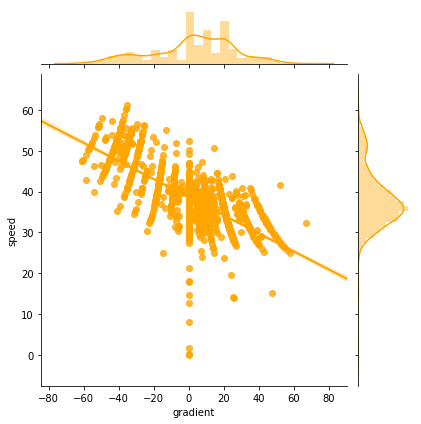

In [8]:
#plot speed vs gradient for the race, comment on the relationship
sns.jointplot(x='gradient',y='speed',data=df,
             kind='reg', color='orange')
plt.show()

#boxplot for positive and negative gradient


From the plot above, we can see that there is a negative relationship between graidient and speed.

A discrete pattern is also found from the plot. The reason of this is due to measure error from the device. It may also cause by different gear generated different group of speed.

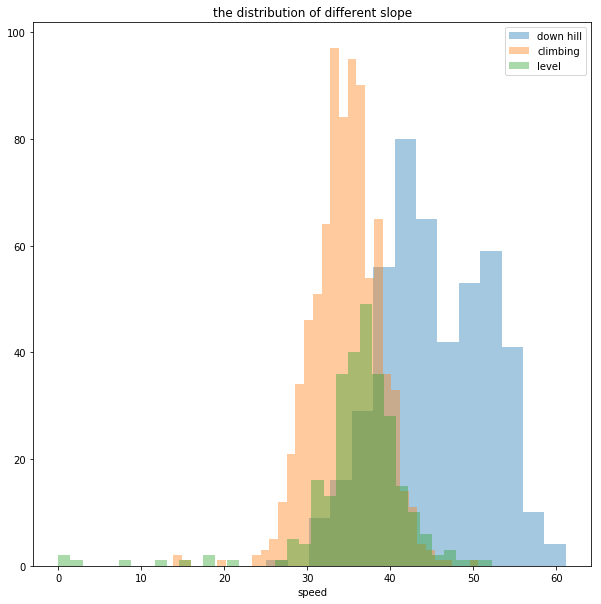

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(df[df.gradient<0]['speed'],label='down hill',kde=False)
sns.distplot(df[df.gradient>0]['speed'],label='climbing',kde=False)
sns.distplot(df[df.gradient==0]['speed'],label='level',kde=False)
plt.legend()
plt.title('the distribution of different slope')
plt.show()

As we further break down the histogram of speed based on gradient ( > 0,< 0, or equals to 0 ), we can see that the speed is similar when the rider climbed or at ground. Whereas the speed is much higher and varies more when the rider went down hill, this is because the cyclist can make use of gravity to have a higher accerleration in downhiling which allow him to exceeds the physical limit of his.  

In [10]:
#count the laps
#setting the starting point reference
df = utils.lapcount('latitude','longitude',df)

# count the number of laps

The rider has completed $\textbf{16}$ laps, the average speed of each lab is as follow:

In [11]:
print(df.groupby('lap')['speed'].mean()[0:-1])

lap
0     36.408025
1     39.808244
2     40.251252
3     38.380441
4     37.823823
5     37.400896
6     37.544219
7     39.617463
8     38.394318
9     35.928587
10    37.181377
11    36.770762
12    38.857652
13    37.649352
14    37.861305
15    38.651158
16    40.799484
Name: speed, dtype: float64


# Challenge

In [12]:
#challenge task
#Tabulate the average speed of the races

#reading all the data
race2 = utils.parse_gpx('data/ride2.gpx').drop_duplicates()
race3 = utils.parse_gpx('data/ride3.gpx').drop_duplicates()
race4 = utils.parse_gpx('data/ride4.gpx').drop_duplicates()
race5 = utils.parse_gpx('data/ride5.gpx').drop_duplicates()
race6 = utils.parse_gpx('data/ride6.gpx').drop_duplicates()
race7 = utils.parse_gpx('data/ride7.gpx').drop_duplicates()
race8 = utils.parse_gpx('data/ride8.gpx').drop_duplicates()
race9 = utils.parse_gpx('data/ride9.gpx').drop_duplicates()
#print('done with reading all race data')


In [13]:
#calculating the speed for all the races
race2 = utils.speed_cal('latitude','longitude','elevation', race2)
race3 = utils.speed_cal('latitude','longitude','elevation', race3)
race4 = utils.speed_cal('latitude','longitude','elevation', race4)
race5 = utils.speed_cal('latitude','longitude','elevation', race5)
race6 = utils.speed_cal('latitude','longitude','elevation', race6)
race7 = utils.speed_cal('latitude','longitude','elevation', race7)
race8 = utils.speed_cal('latitude','longitude','elevation', race8)
race9 = utils.speed_cal('latitude','longitude','elevation', race9)
#print('done with calculating speeds in all races ')

In [14]:
#count the laps of each race
race2 = utils.lapcount('latitude','longitude',race2)
race3 = utils.lapcount('latitude','longitude',race3)
race4 = utils.lapcount('latitude','longitude',race4)
race5 = utils.lapcount('latitude','longitude',race5)
race6 = utils.lapcount('latitude','longitude',race6)
race7 = utils.lapcount('latitude','longitude',race7)
race8 = utils.lapcount('latitude','longitude',race8)
race9 = utils.lapcount('latitude','longitude',race9)
#print('done with calculating laps in all races ')

In [15]:
#create a multiple index include all the data of the races
#index: level0=race, level1=datetime
race_total = pd.concat([df,race2,race3,race4,race5,race6,race7,race8,race9])

# plot Speed on different dates

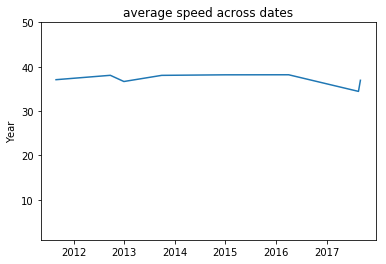

In [26]:
plt.plot(race_total.groupby(race_total.index.date).mean()['speed'])
plt.title('average speed across dates')
plt.ylabel('speed(km/hr)')
plt.ylabel('Year')
plt.ylim(ymin=1,ymax=50)
plt.show()

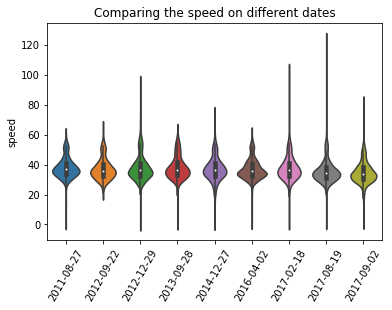

In [17]:
plt.figure(figsize=(10,10))
sns.violinplot(x=sorted(race_total.index.date), y='speed', data=race_total)
plt.xticks(rotation=60)
plt.title('Comparing the speed on different dates')
plt.show()

Although we see the speed of the rider seems to be faster in 2017, we do not see a significant difference when we comparing the distribution of speed across different dates. Hence, we cannot conclude the rider is faster or not as the difference of speed can due to randomness.

# The fast and slowest lap time in each race

In [18]:
import datetime #package to convert seconds to timestamp

#create a dataframe with all the lap time 
#(removed the first and last lap due to uncomplete lap)
laptime = pd.DataFrame({'race1':df.groupby('lap').sum()['delta-time'][1:-1],
                    'race2':race2.groupby('lap').sum()['delta-time'][1:-1],
                    'race3':race3.groupby('lap').sum()['delta-time'][1:-1],
                    'race4':race4.groupby('lap').sum()['delta-time'][1:-1],
                    'race5':race5.groupby('lap').sum()['delta-time'][1:-1],
                    'race6':race6.groupby('lap').sum()['delta-time'][1:-1],
                    'race7':race7.groupby('lap').sum()['delta-time'][1:-1],
                    'race8':race8.groupby('lap').sum()['delta-time'][1:-1],
                    'race9':race9.groupby('lap').sum()['delta-time'][1:-1]})

#for each race tabulate the fastest and slowest lap times
table = pd.DataFrame({'slowest':pd.to_timedelta(laptime.max(),unit='s'), 
                      'fastest':pd.to_timedelta(laptime.min(),unit='s')})
print('fastest and slowest lap time')
print(table)


fastest and slowest lap time
       fastest  slowest
race1 00:03:02 00:03:25
race2 00:03:06 00:03:28
race3 00:03:02 00:03:24
race4 00:03:06 00:03:26
race5 00:02:58 00:04:34
race6 00:03:06 00:03:22
race7 00:03:02 00:03:25
race8 00:03:08 00:03:33
race9 00:03:19 00:03:44


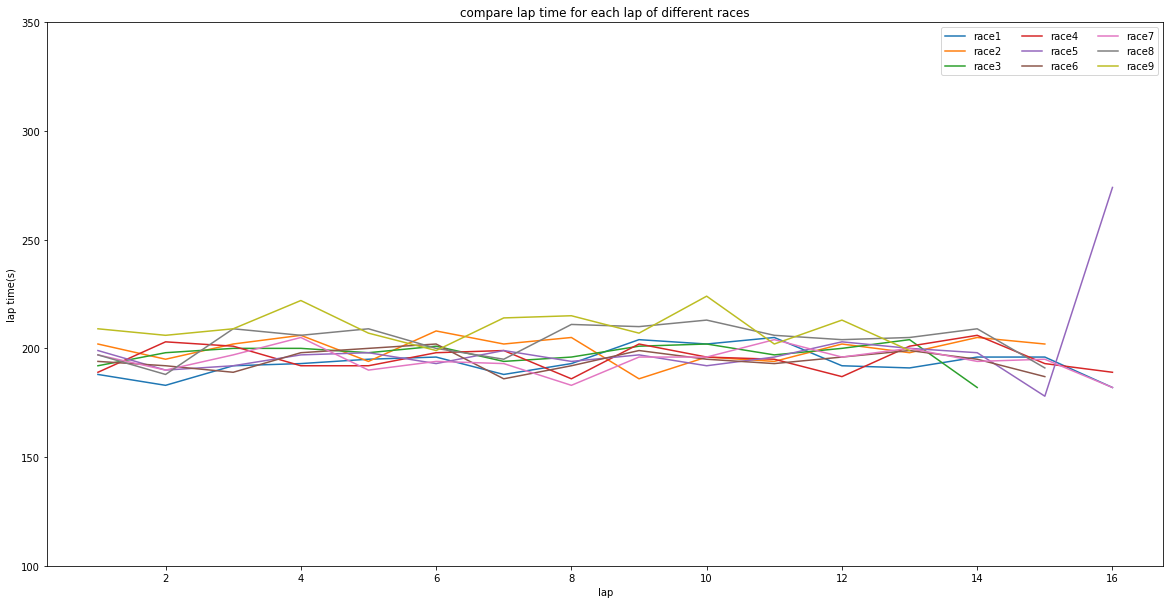

In [20]:

#print(laptime.index.tolist())
#laptime_ln = laptime.melt(id_vars=[],value_vars=['race1','race2','race3','race4','race5','race6','race7','race8','race9'])
#sns.lineplot(x='value',y=laptime.index, data=laptime_ln)
#print(laptime_ln)
plt.figure(figsize=(20,10))
plt.plot(laptime['race1'])
plt.plot(laptime['race2'])
plt.plot(laptime['race3'])
plt.plot(laptime['race4'])
plt.plot(laptime['race5'])
plt.plot(laptime['race6'])
plt.plot(laptime['race7'])
plt.plot(laptime['race8'])
plt.plot(laptime['race9'])
plt.title('compare lap time for each lap of different races')
plt.legend(ncol=3)
plt.ylim(ymin=100, ymax=350)
plt.ylabel('lap time(s)')
plt.xlabel('lap')
plt.show()


Comparing lap times across races, we can see the lap time for the race is ranged around 180 - 225 seconds. However, there is an exception for last lap for race 5 which took the rider almost 5 mins to complete the lap. The cyclist may be injured or cramp.